In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
training_df = pd.read_csv('train.csv')
testing_df = pd.read_csv('test.csv')

In [4]:
def read_and_concat_dataset(training_path, test_path):
    train = pd.read_csv(training_path)
    train['train'] = 1
    test = pd.read_csv(test_path)
    test['train'] = 0
    dataset = train.append(test, ignore_index=True)
    return train, test, dataset

train, test, dataset = read_and_concat_dataset('train.csv', 'test.csv')
dataset = dataset.set_index('PassengerId')

In [5]:
print(dataset.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'train']


In [6]:
dataset.shape

(1309, 12)

In [7]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
testing_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,train
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [11]:
training_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
#checking the corelation between the pclass and survived so that we can check our observations are matching or not
training_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
#checking the corelation between the sex and survived so that we can check our observations are matching or not 
training_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
#checking the corelation between the parch and survived so that we can check our observations are matching or not
training_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


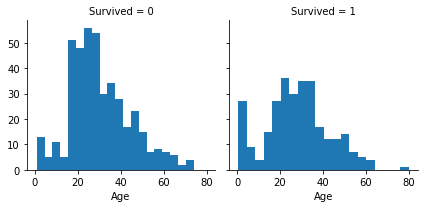

In [15]:
#By visualizing the data we can analyze on how to proceed it
g = sns.FacetGrid(training_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

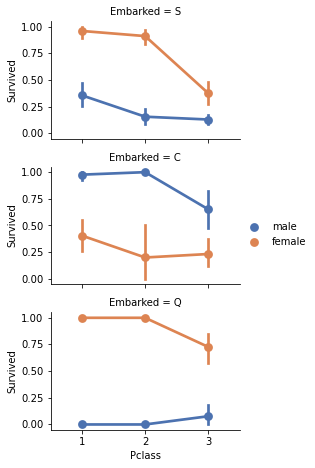

In [16]:
#By visualizing this we can analyze on how to proceed it
grid = sns.FacetGrid(training_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

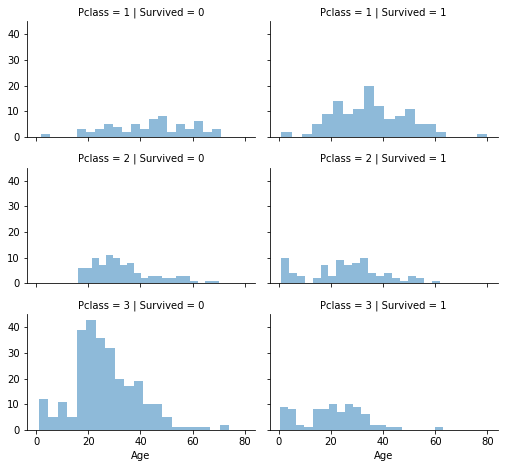

In [17]:
#By visualizing the data we can analyze on how to proceed it
grid = sns.FacetGrid(training_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

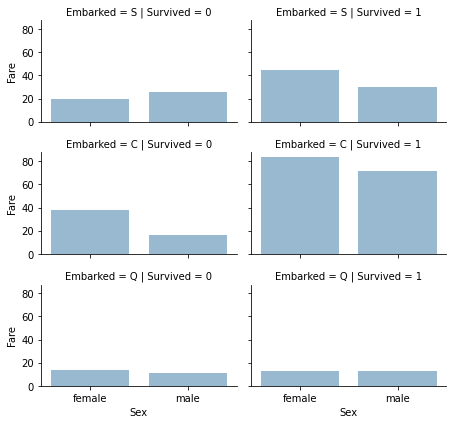

In [18]:
#By visualizing the data we can analyze on how to proceed it
grid = sns.FacetGrid(training_df, row='Embarked', col='Survived', size=2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)

In [19]:
dataset.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
train          0
dtype: int64

In [20]:
dataset.groupby('Pclass').Fare.mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [21]:
print(dataset.Embarked.value_counts())

S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [22]:
dataset.Embarked = dataset.Embarked.fillna('S')
dataset.Fare = dataset.Fare.fillna(0)

In [23]:
dataset.Cabin = dataset.Cabin.fillna('Unknown_Cabin')
dataset['Cabin'] = dataset['Cabin'].str[0]

In [24]:
dataset.groupby('Pclass').Cabin.value_counts()

Pclass  Cabin
1       C         94
        U         67
        B         65
        D         40
        E         34
        A         22
        T          1
2       U        254
        F         13
        D          6
        E          4
3       U        693
        F          8
        G          5
        E          3
Name: Cabin, dtype: int64

In [25]:
dataset['Cabin'] = np.where((dataset.Pclass==1) & (dataset.Cabin=='U'),'C',
                                            np.where((dataset.Pclass==2) & (dataset.Cabin=='U'),'D',
                                                                        np.where((dataset.Pclass==3) & (dataset.Cabin=='U'),'G',
                                                                                                    np.where(dataset.Cabin=='T','C',dataset.Cabin))))

In [26]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(dataset['Title'], dataset['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [28]:
dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
training_df['Title'] = dataset['Title'][:891]
testing_df['Title'] = dataset['Title'][891:]
training_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Dr,0.428571
1,Master,0.550000
2,Miss,0.345946
3,Mr,0.366279
4,Mrs,0.444444
5,Other,0.500000


In [29]:
dataset.groupby('Title').Age.mean()

Title
Dr        43.571429
Master     5.482642
Miss      21.824366
Mr        32.252151
Mrs       36.918129
Other     45.714286
Name: Age, dtype: float64

In [30]:
dataset['Age'] = np.where((dataset.Age.isnull()) & (dataset.Title=='Master'),5,
                        np.where((dataset.Age.isnull()) & (dataset.Title=='Miss'),22,
                                 np.where((dataset.Age.isnull()) & (dataset.Title=='Mr'),32,
                                          np.where((dataset.Age.isnull()) & (dataset.Title=='Mrs'),37,
                                                  np.where((dataset.Age.isnull()) & (dataset.Title=='Other'),45,
                                                           np.where((dataset.Age.isnull()) & (dataset.Title=='Dr'),44,dataset.Age))))))                   

In [31]:
training_df['Age'] = dataset['Age'][:891]
testing_df['Age'] = dataset['Age'][891:]

In [32]:
dataset.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
train         0
Title         0
dtype: int64

## Feature engineering

In [33]:
dataset['FamilySize'] = dataset.SibSp + dataset.Parch + 1
dataset['Mother'] = np.where((dataset.Title=='Mrs') & (dataset.Parch >0),1,0)
dataset['Women'] = np.where(dataset.Sex=='female',1,0)
dataset = dataset.drop(['SibSp','Parch','Sex','Ticket','Name'],axis=1)


In [34]:
bins = [0,12,24,45,60,dataset.Age.max()]
labels = ['Child', 'Teen', 'Adult','Older Adult','Senior']
dataset["Age"] = pd.cut(dataset["Age"], bins, labels = labels)

In [35]:
dataset = pd.get_dummies(dataset)

In [36]:
X_train = training_df.drop("Survived", axis=1)
Y_train = training_df["Survived"]
X_test  = testing_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 12), (891,), (418, 12))

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(dataset[dataset.Survived.isnull()==False].drop('Survived',axis=1),dataset.Survived[dataset.Survived.isnull()==False],test_size=0.30, random_state=2019)

In [38]:
Results = pd.DataFrame({'Model': [],'Accuracy Score': [], 'Recall':[], 'F1score':[]})

In [39]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
res = pd.DataFrame({"Model":['DecisionTreeClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred,ytest)],
                   "Recall": [recall_score(ytest, y_pred)],
                   "F1score": [f1_score(ytest, y_pred)]})
Results = Results.append(res)

In [41]:
pd.crosstab(ytest, y_pred, rownames=['Real data'], colnames=['Predicted'])

Predicted,0.0,1.0
Real data,,
0.0,163,13
1.0,32,60


In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=2500, max_depth=4)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
res = pd.DataFrame({"Model":['RandomForestClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred,ytest)],
                   "Recall": [recall_score(ytest, y_pred)],
                   "F1score": [f1_score(ytest, y_pred)]})
Results = Results.append(res)

In [43]:
pd.crosstab(ytest, y_pred, rownames=['Real data'], colnames=['Predicted'])

Predicted,0.0,1.0
Real data,,
0.0,162,14
1.0,25,67


In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
res = pd.DataFrame({"Model":['KNeighborsClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred,ytest)],
                   "Recall": [recall_score(ytest, y_pred)],
                   "F1score": [f1_score(ytest, y_pred)]})
Results = Results.append(res)

In [45]:
pd.crosstab(ytest, y_pred, rownames=['Real data'], colnames=['Predicted'])


Predicted,0.0,1.0
Real data,,
0.0,141,35
1.0,36,56


In [46]:
from sklearn.svm import SVC
model = SVC()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
res = pd.DataFrame({"Model":['SVC'],
                    "Accuracy Score": [accuracy_score(y_pred,ytest)],
                   "Recall": [recall_score(ytest, y_pred)],
                   "F1score": [f1_score(ytest, y_pred)]})
Results = Results.append(res)

In [47]:
pd.crosstab(ytest, y_pred, rownames=['Real data'], colnames=['Predicted'])

Predicted,0.0,1.0
Real data,,
0.0,158,18
1.0,60,32


In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
res = pd.DataFrame({"Model":['LogisticRegression'],
                    "Accuracy Score": [accuracy_score(y_pred,ytest)],
                   "Recall": [recall_score(ytest, y_pred)],
                   "F1score": [f1_score(ytest, y_pred)]})
Results = Results.append(res)

In [49]:
pd.crosstab(ytest, y_pred, rownames=['Real data'], colnames=['Predicted'])

Predicted,0.0,1.0
Real data,,
0.0,152,24
1.0,21,71


In [50]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier(learning_rate=0.001,n_estimators=2500,
                                max_depth=4, min_child_weight=0,
                                gamma=0, subsample=0.7,
                                colsample_bytree=0.7,
                                scale_pos_weight=1, seed=27,
                                reg_alpha=0.00006)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
res = pd.DataFrame({"Model":['XGBClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred,ytest)],
                   "Recall": [recall_score(ytest, y_pred)],
                   "F1score": [f1_score(ytest, y_pred)]})
Results = Results.append(res)

In [51]:
pd.crosstab(ytest, y_pred, rownames=['Real data'], colnames=['Predicted'])

Predicted,0,1
Real data,,
0.0,160,16
1.0,23,69


In [52]:
Results

,Model,Accuracy Score,Recall,F1score
0,DecisionTreeClassifier,0.832090,0.652174,0.727273
0,RandomForestClassifier,0.854478,0.728261,0.774566
0,KNeighborsClassifier,0.735075,0.608696,0.612022
0,SVC,0.708955,0.347826,0.450704
0,LogisticRegression,0.832090,0.771739,0.759358
0,XGBClassifier,0.854478,0.750000,0.779661


In [53]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
xtrain = dataset[dataset.Survived.isnull()==False].drop(['Survived','train'],axis=1)
ytrain = dataset.Survived[dataset.Survived.isnull()==False]
xtest = dataset[dataset.Survived.isnull()==True].drop(['Survived','train'],axis=1)
model = XGBClassifier(learning_rate=0.001,n_estimators=2500,
                                max_depth=4, min_child_weight=0,
                                gamma=0, subsample=0.7,
                                colsample_bytree=0.7,
                                scale_pos_weight=1, seed=27,
                                reg_alpha=0.00006)
model.fit(xtrain, ytrain)
test = dataset[dataset.train==0]
test['Survived'] = model.predict(xtest).astype(int)
test = test.reset_index()
test[['PassengerId','Survived']].to_csv("submission.csv",index=False)
print("done1")

done1
